In [1]:
import csv
import pandas as pd


candydata = pd.read_csv(r'/Users/christinemagnotta/candydata.csv')
print(candydata)

#Importing candydata

   State            Top Candy   Pounds         Second Place  Pounds.1  \
0     AK                 Twix     4908            Milky Way      4072   
1     AL           Candy Corn   115269            Starburst    111280   
2     AR       Jolly Ranchers   228645         Butterfinger    201845   
3     AZ          Hot Tamales   751772       Hershey Kisses    732991   
4     CA             Skittles  1509827         Reese's Cups   1059223   
5     CO       Hershey Kisses   129826                 Twix    127840   
6     CT            Milky Way     2987           Almond Joy      2278   
7     DC                M&M's    27546         Tootsie Pops     24725   
8     DE             Skittles    21336          Life Savers     16703   
9     FL             Skittles   598285         Reese's Cups    501926   
10    GA         Swedish Fish   145827       Jolly Ranchers    124872   
11    HI             Skittles    28091  Hershey's Mini Bars     25783   
12    IA                M&M's    67829         Rees

In [2]:
candydata.head() #I seem to have an extra column, Unamed:10

,State,Top Candy,Pounds,Second Place,Pounds.1,Third Place,Pounds.2,State Total,Population (in Millions),Pounds Per Million,Unnamed: 10
0,AK,Twix,4908,Milky Way,4072,Blow Pops,3988,12968,0.7,18525.71429,NaN
1,AL,Candy Corn,115269,Starburst,111280,Skittles,98771,325320,4.9,66391.83673,NaN
2,AR,Jolly Ranchers,228645,Butterfinger,201845,Skittles,76353,506843,3.0,168947.66670,NaN
3,AZ,Hot Tamales,751772,Hershey Kisses,732991,Snickers,682562,2167325,7.3,296893.83560,NaN
4,CA,Skittles,1509827,Reese's Cups,1059223,M&M's,1009388,3578438,39.5,90593.36709,NaN


In [3]:
candydata = candydata.drop(columns=['Unnamed: 10']) #dropped extra column

In [4]:
for col in candydata.columns: 
    print(col)   #checking for extra column/making sure it got dropped.

State
Top Candy
Pounds
Second Place
Pounds.1
Third Place
Pounds.2
State Total
Population (in Millions)
Pounds Per Million


In [5]:
candydata.head() #I pre-sorted the data, using Excel, and summed up the amount of candy consumed by each state, and then added the population, in millions.
#The final column is the amount of candy eaten, per 1 million people.
#Pounds = the amount, in pounds, of the candy's top seller.
#Pounds.1 = the amount of the state's second most purchased candy.
#Pounds.2 = the amount of the state's third most purchased candy.
#This isn't a comprehensive table that measures ALL candy consumed by the people of state.
#It measure the total sales of the top three kinds of candy in each state.


,State,Top Candy,Pounds,Second Place,Pounds.1,Third Place,Pounds.2,State Total,Population (in Millions),Pounds Per Million
0,AK,Twix,4908,Milky Way,4072,Blow Pops,3988,12968,0.7,18525.71429
1,AL,Candy Corn,115269,Starburst,111280,Skittles,98771,325320,4.9,66391.83673
2,AR,Jolly Ranchers,228645,Butterfinger,201845,Skittles,76353,506843,3.0,168947.66670
3,AZ,Hot Tamales,751772,Hershey Kisses,732991,Snickers,682562,2167325,7.3,296893.83560
4,CA,Skittles,1509827,Reese's Cups,1059223,M&M's,1009388,3578438,39.5,90593.36709


In [6]:
#Now I want to see what state has bought the most candy.
#Here is the total, in pounds, of candy that each state has bought.
#I wanted to add some way to measure the amount of candy purchased, based on population, because otherwise the top five would be California and Texas because they have the most people.
#Arizona, however, would be number three.

#So Arizona buys about a third of a pound of Halloween candy per person. And what they buy most is Hot Tamales.
#Utah, Nevada, Kansas and North Dakota round out the top five.

#Illinois is towards the bottom...wooo?
#The most frequently bought Halloween candies here are Sour Patch Kids, Kit Kat and Starburst.

#I also want to point out California's numbers. The people in that state purchased more than 1.5 million pounds of Skittles for Halloween.
#That will come in handy to remember later.

#In retrospect, I should have divided the amount of candy purchased by total population, rather than population in millions.

candydata.groupby(by="Pounds Per Million").max()
topcandydata = candydata.groupby(by="Pounds Per Million").max()
topcandydata.sort_values(by = "Pounds Per Million", ascending=False)

,State,Top Candy,Pounds,Second Place,Pounds.1,Third Place,Pounds.2,State Total,Population (in Millions)
Pounds Per Million,,,,,,,,,
296893.835600,AZ,Hot Tamales,751772,Hershey Kisses,732991,Snickers,682562,2167325,7.3
285771.875000,UT,Jolly Ranchers,413099,Tootsie Pops,260378,Candy Corn,240993,914470,3.2
263636.774200,NV,Hershey Kisses,310974,Hot Tamales,286464,Candy Corn,219836,817274,3.1
218405.862100,KS,Reese's Cups,229857,M&M's,213784,Snickers,189736,633377,2.9
210581.250000,ND,Candy Corn,61837,Hot Tamales,56745,Jolly Ranchers,49883,168465,0.8
168947.666700,AR,Jolly Ranchers,228645,Butterfinger,201845,Skittles,76353,506843,3.0
131858.333300,VT,Skittles,34670,M&M's,24536,Milky Way,19909,79115,0.6
118063.571400,NH,M&M's,69692,Starburst,59822,Jolly Ranchers,35775,165289,1.4
117810.526300,NE,Sour Patch Kids,98486,Salt Water Taffy,89734,Twix,35620,223840,1.9


In [7]:
#Now let's see this visualized.

In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
candyplot = topcandydata.reset_index("Pounds Per Million") #Resetting the index so that I can plot with Pounds Per Million

In [10]:
poundsPerState = candyplot[["State", "Pounds Per Million"]]

In [11]:
poundsPerState  #I stripped all data, other than State and Pounds Per Million. 

,State,Pounds Per Million
0,CT,1956.285714
1,OK,11879.743590
2,MD,15354.500000
3,NY,18401.128210
4,AK,18525.714290
5,MO,19471.311480
6,TN,21103.823530
7,NC,23702.190480
8,MA,27665.507250
9,MI,32860.606060


In [12]:
topState = poundsPerState[40:51]

#I tried to plot all 50 states, but it was incomprehensible and garbled. So here are the top five states.

Text(0.5, 1.0, 'Which states bought the most candy, per person?')

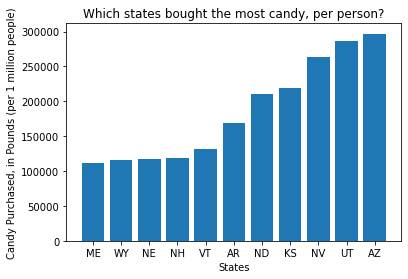

In [81]:
plt.bar(topState['State'], topState['Pounds Per Million'])
plt.savefig("PoundsPerState.png")
plt.xlabel("States")
plt.ylabel("Candy Purchased, in Pounds (per 1 million people)")
plt.title("Which states bought the most candy, per person?")
#Here's a bar graph of the state's purchasing the most candy.
#People in Arizona and Utah purchase almost three times as much candy as people in Maine, which is number 10 in the top purchaing states list.
#Nevada is up there, too, with about 2.5 times as much candy as Maine.
#One could come to the conclusion, then, that the southwestern mountain states purchase the most candy.
#Southwestern mountain state = AZ, UT and NV.
 

Text(0.5, 1.0, 'Which states bought the least candy, per person?')

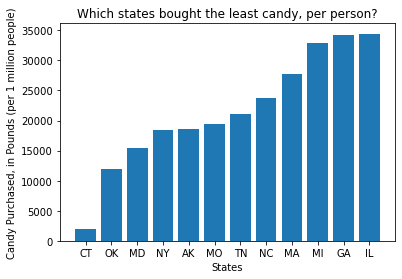

In [84]:
bottomState = poundsPerState[0:12]
plt.bar(bottomState['State'], bottomState['Pounds Per Million'])
plt.savefig("BottomPoundsPerState.png")
plt.xlabel("States")
plt.ylabel("Candy Purchased, in Pounds (per 1 million people)")
plt.title("Which states bought the least candy, per person?")

#The states purchasing the least candy, in pounds, per person, is Connecticut.
#Also at the bottom of this list is Oklahoma, Maryland and New York.
#As you can see, Il is 12th from the bottom.

In [18]:
poundsPerState.describe()

,Pounds Per Million
count,51.000000
mean,80716.867501
std,68536.731254
min,1956.285714
25%,37687.752135
50%,61912.777780
75%,102821.904800
max,296893.835600


Text(0.5, 1.0, 'Are there any outliers?')

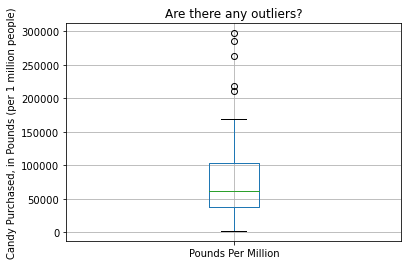

In [87]:
poundsPerState.boxplot(column=['Pounds Per Million'])
plt.savefig("SalesBoxPlot.png")
plt.ylabel("Candy Purchased, in Pounds (per 1 million people)")
plt.title("Are there any outliers?")

#I expected to find that Connecticut's sales would make it an outlier, but it is within the lower limit.
#However five of the top purchasing states are outliers.

In [20]:
topCandy = candydata[["Top Candy", "Pounds"]]
#Isolating the values for the amount of each candy purchased.

In [42]:
topCandy

,Top Candy,Pounds
0,Twix,4908
1,Candy Corn,115269
2,Jolly Ranchers,228645
3,Hot Tamales,751772
4,Skittles,1509827
5,Hershey Kisses,129826
6,Milky Way,2987
7,M&M's,27546
8,Skittles,21336
9,Skittles,598285


In [43]:
topPlaceSales = topCandy.groupby('Top Candy').sum()

In [22]:
topPlaceSales

,Pounds
Top Candy,
3 Musketeers,95727
Blow Pops,170236
Butterfinger,119664
Candy Corn,292375
Dubble Bubble Gum,49005
Hershey Kisses,440800
Hershey's Mini Bars,315429
Hot Tamales,751772
Jolly Ranchers,721836


Text(0.5, 1.0, 'Purchase Data for Top Choice Candies')

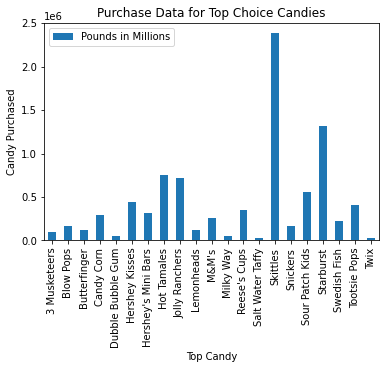

In [90]:
topPlaceSales.reset_index().plot.bar(x='Top Candy', y='Pounds', label='Pounds in Millions')
plt.savefig("CandyPounds.png")
plt.ylabel("Candy Purchased")
plt.title("Purchase Data for Top Choice Candies")

#This is a plot of sales, in millions of pounds of the top-selling candies.
#From this list we see that Skittles has the most sales.
#That is because of California. Skittles was the top-selling candy there.
#In California alone, people buy 1,509,827 pounds of Skittles.
#So more than half of all Skittles sales was from California.
#Other than Skittles and Starburst, sales are fairly evenly distributed.

In [45]:
topPlaceSales.describe()

,Pounds
count,2.100000e+01
mean,4.198391e+05
std,5.464388e+05
min,2.273500e+04
25%,1.157890e+05
50%,2.548390e+05
75%,4.408000e+05
max,2.383036e+06


Text(0.5, 1.0, 'Are there any outliers among top choice candies?')

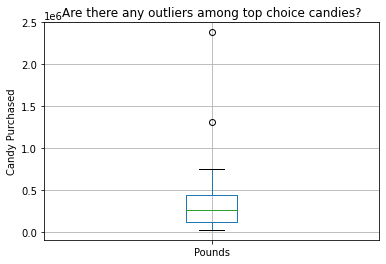

In [91]:
#Is the sales of Skittles an outlier though?

topPlaceSales.boxplot
candyBox = topPlaceSales.boxplot(column=['Pounds'])
plt.savefig("CandyBox.png")
plt.ylabel("Candy Purchased")
plt.title("Are there any outliers among top choice candies?")


In [25]:
#Yes, it is and so is Starburst.
#The amount of Starburst and Skittles purchased exceeds the rest of the Top Candy choices.
#It's even almost twice as much as the third place winner, Hot Tamales.

In [46]:
adjustedcandy = topPlaceSales.sort_values(by = "Pounds", ascending=False)
adjustedcandy = adjustedcandy[2:21]

Text(0.5, 1.0, 'This shows Top Choice candy purchase data, without the outliers')

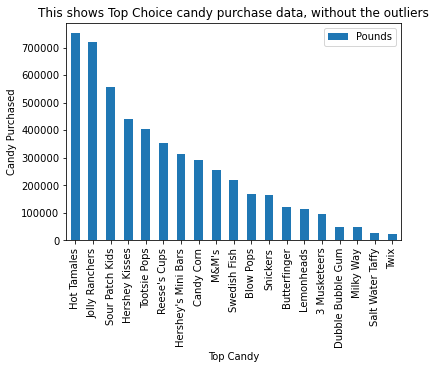

In [92]:
adjustedcandy.plot.bar(label='Pounds in Millions')
plt.savefig("AdjustedCandyBar.png")
plt.ylabel("Candy Purchased")
plt.title("This shows Top Choice candy purchase data, without the outliers")

#Here wee see a slightly better distribution. Hot Tamales and Jolly Ranchers have the most pounds purchased here.
#Which is interesting.
#There is nothing with the attribute "chocolatey" in the top five!

In [ ]:
#I just want to point out that people bought more candy corn than M&M's, Snickers, Butterfingers, 3 Musketeers, Milky Way and Twix.
#Also, who buys Salt Water Taffy for Halloween?

In [31]:
adjustedcandy.describe()

,Pounds
count,19.000000
mean,269565.894737
std,222742.058437
min,22735.000000
25%,105758.000000
50%,221081.000000
75%,377907.000000
max,751772.000000


Text(0.5, 1.0, "Let's see if there are any outliers")

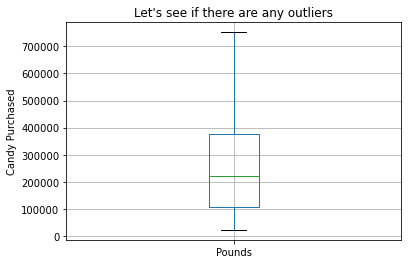

In [107]:
adjustedcandy.boxplot
adjustedcandyBox = adjustedcandy.boxplot(column=['Pounds'])
plt.savefig("AdjustedCandyBox.png")
plt.ylabel("Candy Purchased")
plt.title("Let's see if there are any outliers")

#If you were wondering -- no outliers. I thought the bottom choice would be on the low side, but i was wrong.

In [39]:
secondCandy = candydata[["Second Place", "Pounds.1"]]
secondPlaceSales = secondCandy.groupby('Second Place').sum()

thirdCandy = candydata[["Third Place", "Pounds.2"]] 
thirdPlaceSales = thirdCandy.groupby('Third Place').sum()

#I'm collecting data of Second and Thid Place Sales so I can get a better idea of total sales for each candy.

In [51]:
reNameTop = topCandy.rename(columns={"Top Candy": "Candy"})
#I'm setting to a variable the three dataframes with renamed columns so I can concat them.
reNameSecond = secondCandy.rename(columns={"Second Place": "Candy", "Pounds.1": "Pounds"})
reNameThird = thirdCandy.rename(columns={"Third Place": "Candy", "Pounds.2": "Pounds"})

In [52]:
totalCandySales = pd.concat([reNameTop, reNameSecond, reNameThird])
 
#Here is a new dataframe that should give me total sales of the first, second and third place candies.

#And here I perform a groupby to add up the total purchases for each candy.

salesbycandy = totalCandySales.groupby('Candy').sum()
salesbycandy

,Pounds
Candy,
3 Musketeers,95727
Almond Joy,39060
Blow Pops,334687
Butterfinger,582276
Candy Corn,1306444
Dubble Bubble Gum,151835
Hershey Kisses,1204214
Hershey's Mini Bars,341212
Hot Tamales,1581866


In [53]:
topCandySales = salesbycandy.sort_values(by='Pounds', ascending=False)
topCandySales

#And now it's sorted from most sales to least.

,Pounds
Candy,
Skittles,3295512
Reese's Cups,3277456
Starburst,2318761
M&M's,2092115
Hot Tamales,1581866
Candy Corn,1306444
Snickers,1297302
Sour Patch Kids,1215193
Hershey Kisses,1204214


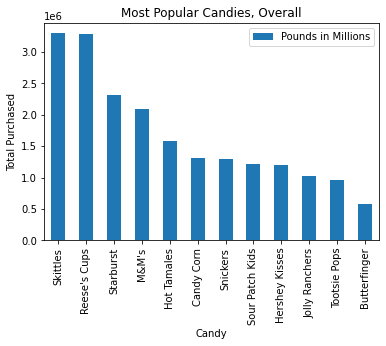

In [93]:
plotCandySales = topCandySales[0:12].reset_index()

plotCandySales.plot.bar(x='Candy', y='Pounds', label='Pounds in Millions')
plt.ylabel("Total Purchased")
plt.title("Most Popular Candies, Overall")

plt.savefig("PlotCandySales.png")

#This graph uses the data from First, Second and Third Place to approximate the amount of each candy purchased

In [55]:
#Above is a chart showing sales for the top three candies in all 50 states.
#The top five is Skittles -- again because of California, Reese's Cups, Starburst, M&M's and Hot Tamales, on the strength of sales in Arizona.
#Sadly, Candy Corn is #5.
#Candy Corn, we decided is the fruitcake of Halloween.

In [56]:
bottomCandySales = topCandySales[13:24].reset_index()

Text(0.5, 1.0, 'Least Popular Candies, Overall')

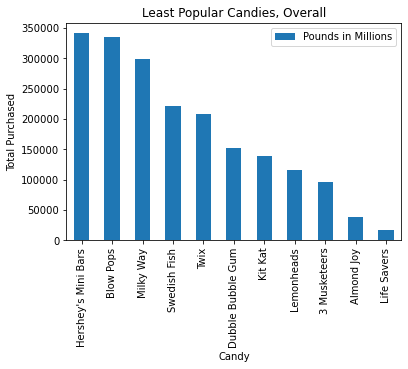

In [94]:
bottomCandySales.plot.bar(x='Candy', y='Pounds', label='Pounds in Millions')
plt.ylabel("Total Purchased")
plt.savefig("BottomCandySales.png")
plt.title("Least Popular Candies, Overall")

#I'm calling this LEAST popular, but these candies were still in the top three of all candy purchased.
#So it is not the most fitting name.
#However, my data for candy purchases isn't comprehensive. All I have is data on the three most popular candies, by state.
#So being on this list means the candy is fairly popular.

In [60]:
#Do states with more kids buy more candy for Halloween?


averageage = pd.read_csv(r'/Users/christinemagnotta/candyology/ageunder18.csv')
averageageDF = pd.DataFrame(averageage)

#Here is a new data set of the percentage of a state's population that is under the age of 18.

In [61]:
ageCandy = pd.merge(poundsPerState, averageageDF, on='State')
ageCandyRename = ageCandy.rename(columns={"Age Under 18": "Percent Under 18"})
#For clarification, I wanted to rename column Age Under 18 to Percentage Under 18

In [67]:
ageCandy

,State,Pounds Per Million,Age Under 18
0,CT,1956.285714,21.7
1,OK,11879.743590,25.6
2,MD,15354.500000,23.3
3,NY,18401.128210,21.7
4,AK,18525.714290,25.9
5,MO,19471.311480,23.6
6,TN,21103.823530,23.5
7,NC,23702.190480,23.5
8,MA,27665.507250,20.9
9,MI,32860.606060,22.7


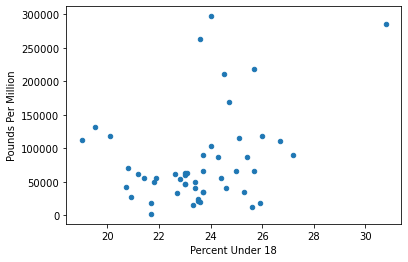

In [102]:
from scipy.stats import linregress

ageCandyRename.plot.scatter(x="Percent Under 18",
                      y='Pounds Per Million')
plt.savefig("ScatterPounds.png")

In [63]:
ageCandyRename.corr(method='pearson')

,Pounds Per Million,Percent Under 18
Pounds Per Million,1.000000,0.330579
Percent Under 18,0.330579,1.000000


In [ ]:
#Using Pearson's Correlation Coefficient, it appears that there is a weak correlation between how much of a state's population is under 18 and how much candy they buy for Halloween.
#Although I would point out that Utah has the highest percentage of kids and is one of the states purchaing the most candy.


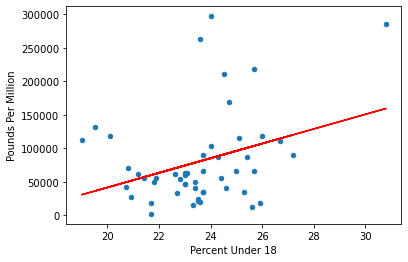

In [104]:
ageCandyRename.plot.scatter(x="Percent Under 18",
                      y='Pounds Per Million')
x_values = ageCandyRename["Percent Under 18"]
y_values = ageCandyRename["Pounds Per Million"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")


#Here is the scatterplot, with the linear regression for relationship visualization.